<table>
    <tr>
        <td style="text-align:left">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9ItLTT_F-3Q30cu7ZCCoKmuFGBt22pe7pNA" alt="Logo Universidad" width="300"/>
        </td>
        <td>
            Departamento de Ciencias de la Computación y de la Decisión<br>
            Facultad de Minas<br>
            Universidad Nacional de Colombia<br>
            Optimizacion e IA 2024-2S<br><br>
            Docente: Maria Constanza Torres Madronero<br>
            <br>
            Contribuciones a la guia por: <br>
            - Deimer Miranda Montoya (2023)<br>
            - Luis Fernando Becerra Monsalve (2024)
        </td>    
    </tr>
</table>

# Clasificacion supervisada

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd


In [3]:
#Cargar los datos
iris = datasets.load_iris()

#Organizamos los datos en un DataFrame de panda
data = pd.DataFrame({
    'sepal length' :iris.data[:,0],
    'sepal width' :iris.data[:,1],
    'petal length' :iris.data[:,2],
    'petal width' :iris.data[:,3],
    'species' :iris.target
})

In [ ]:
# Dividimos los datos entre las muestras de entrenamiento y prueba
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']] #Muestras

# X = data[['sepal length', 'petal length', 'petal width']] #Muestras
y = data['species'] #Etiquetas

# Seleccionamos 70% de muestras para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### <span style = 'color: red'>A.</span> Optimizacion de hiperparametros usando busqueda de grilla

In [5]:
#Vamos a seleccionar los hiperparametros de nuestro Random Forest empleando la busqueda
#de grilla. La libreria sklearn incluye este metodo
import numpy as np
from sklearn.model_selection import GridSearchCV

#Creamos la grilla con los parametros a seleccionar
param_grid = {
    'n_estimators': np.arange(10, 100, 10,),
    'criterion': ['gini', 'entropy',],
    'max_depth': [3, 5, 10, 20],
}

#Defimos el clasificador base
base_estimator = RandomForestClassifier(random_state=0,)
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(
    base_estimator,
    param_grid,
)
#Nota: no se olviden de invocar el metodo para entrenar .fit
RF_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [6]:
#Podemos ver que parametros fueron los seleccionados
RF_gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': np.int64(60)}

In [7]:
#Usamos el clasificador y analizamos su precision
y_pred = RF_gridSearch.best_estimator_.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9111111111111111


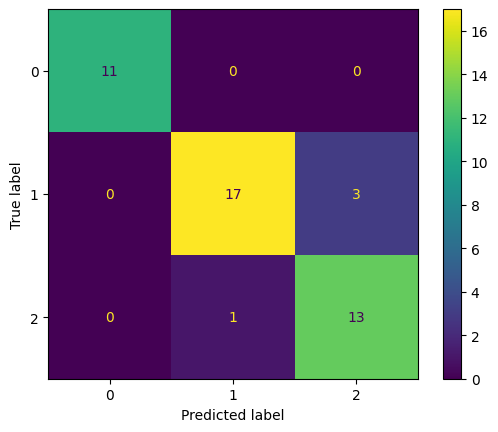

In [10]:
#Otra alternativa para analizar el desempeño es la matriz de confusion
#tambien podemos calcularla desde la libreria sklearn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=RF_gridSearch.best_estimator_.classes_,
)
disp.plot()

## <span style = 'color:red'>B.</span> Optimización de hiperparámetros usando busqueda aleatoria

In [11]:
# Ahora, vamos a seleccionar los hiperparametros empleando busqueda aleatoria
# este tipo de optimizador tambien se encuentra en sklearn
from sklearn.model_selection import RandomizedSearchCV
# Creamos la grilla de hiperparametros, entre las cuales se seleccionara de forma
# aleatoria la mejor configuracion

param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'criterion': ['gini', 'entropy',],
    'max_depth': [3, 5, 10, 20,],
}

# Definimos el clasificador base
base_estimator = RandomForestClassifier(random_state=0, )
# Seleccionamos los hiperparametros
RF_randomSearch = RandomizedSearchCV(
    base_estimator,
    param_grid,
    n_iter=15,
)
# Nota: despues de emplear RandomizedSearchVC tambien se requiere entrenar
# el modelo
RF_randomSearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [12]:
#Revisamos los parametros seleccionados
RF_gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': np.int64(60)}

In [13]:
#Calculamos la precision
y_test=RF_randomSearch.predict(X_test)
print("Accuracy - Opt", metrics.accuracy_score(y_test,y_pred))

Accuracy - Opt 0.9777777777777777


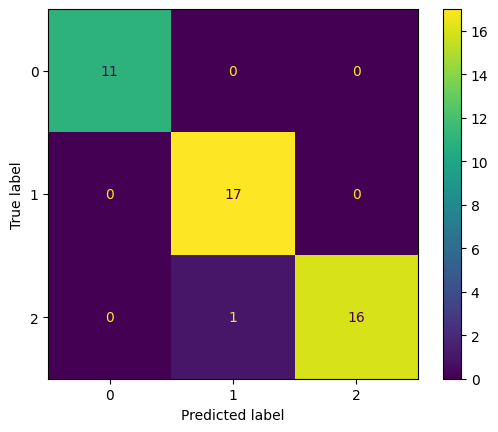

In [14]:
#Calculamos la matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF_gridSearch.best_estimator_.classes_)
disp.plot()

#### Anotaciones importantes
1.	Nota que cada vez que corres el programa, cambian las muestras de entrenamiento y prueba, ya que estas son seleccionadas aleatoriamente. Por tanto, cambian los resultados de precisión. Para evitar el sesgo en el entrenamiento se debe incorporar métodos de validación cruzada.
2.	Compara los tiempos de ejecución tanto de la búsqueda en grilla como la búsqueda aleatoria. Usualmente, la búsqueda aleatoria converge mas rápido que la búsqueda por grilla.
3.	Si decides cambiar el espacio de representación, es decir, trabajar con un subconjunto de las características, es necesario volver a optimizar los hiperparametros. En clasificadores con SVM, RG e incluso NN pequeñas este proceso puede no ser costoso, pero en arquitecturas complejas puede tomar mucho tiempo.
